In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 데이터 누락 확인

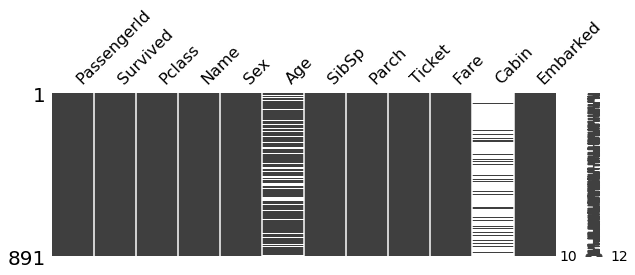

In [3]:
msno.matrix(train, figsize=(10,3))

> 누락된 나이 여자, Pclass 평균으로 입력

In [12]:
#groupby 사용법
train.groupby('Sex')[['Age', 'Pclass', 'Survived']].mean()

,Age,Pclass,Survived
Sex,,,
female,27.915709,2.159236,0.742038
male,30.726645,2.389948,0.188908


## pivot_table 사용

In [18]:
train.pivot_table(train,['Sex', 'Pclass'], aggfunc=np.mean)

Age        Fare     Parch  PassengerId     SibSp  \
Sex    Pclass                                                           
female 1       34.611765  106.125798  0.457447   469.212766  0.553191   
       2       28.722973   21.970121  0.605263   443.105263  0.486842   
       3       21.750000   16.118810  0.798611   399.729167  0.895833   
male   1       41.281386   67.226127  0.278689   455.729508  0.311475   
       2       30.740707   19.741782  0.222222   447.962963  0.342593   
       3       26.507589   12.661633  0.224784   455.515850  0.498559   

               Survived  
Sex    Pclass            
female 1       0.968085  
       2       0.921053  
       3       0.500000  
male   1       0.368852  
       2       0.157407  
       3       0.135447

In [36]:
train.pivot_table(train,index=['Survived', 'Sex'],aggfunc=np.mean)

Age       Fare     Parch  PassengerId    Pclass  \
Survived Sex                                                             
0        female  25.046875  23.024385  1.037037   434.851852  2.851852   
         male    31.618056  21.960993  0.207265   449.121795  2.476496   
1        female  28.847716  51.938573  0.515021   429.699571  1.918455   
         male    27.276022  40.821484  0.357798   475.724771  2.018349   

                    SibSp  
Survived Sex               
0        female  1.209877  
         male    0.440171  
1        female  0.515021  
         male    0.385321

## 피벗테이블을 이용해서 내가 알고 싶은 값만 보기

In [37]:
train.pivot_table('Age', ['Sex', 'Pclass'], aggfunc=np.mean)

Age
Sex    Pclass           
female 1       34.611765
       2       28.722973
       3       21.750000
male   1       41.281386
       2       30.740707
       3       26.507589

In [45]:
train.groupby('Sex')[['Age']].mean()

,Age
Sex,
female,27.915709
male,30.726645


In [46]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# 나이관련 그룹, 피벗 하는 방법

In [50]:
train.groupby(['Pclass', 'Sex'])[['Age']].mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [52]:
train['Age'] = train['Age'].fillna(train.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

In [54]:
test['Age'] = test['Age'].fillna(test.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

In [57]:
train.groupby(['Pclass', 'Sex'])[['Age']].mean()

Age
Pclass Sex              
1      female  34.648936
       male    41.060820
2      female  28.703947
       male    30.678981
3      female  21.677083
       male    26.099193

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
train.drop(columns='Cabin', inplace=True)

In [62]:
test.drop(columns='Cabin', inplace=True)

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [66]:
train.drop(columns='Ticket', inplace=True)
test.drop(columns='Ticket', inplace=True)

In [67]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [69]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [70]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [73]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [81]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True)

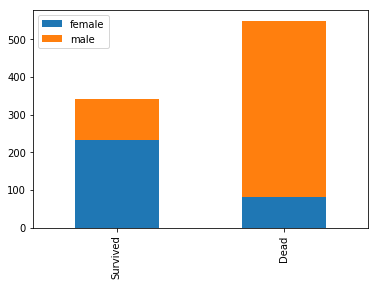

In [84]:
bar_chart('Sex')

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x1a2dca6470>>

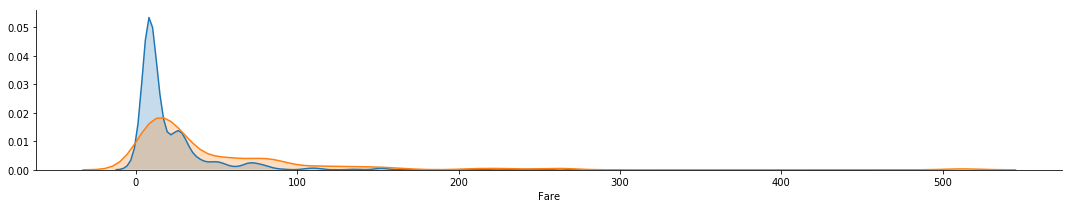

In [88]:
facet = sns.FacetGrid(train, hue='Survived', aspect=5)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.add_legend